In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [6]:
def highlight_cell(x):
    if x['Bet']:
        return ['background-color: yellow']
    else:
        return ['background-color: None']


In [28]:
games = pd.read_pickle('../data/pkl/betting_predictions_2023-03-16.pkl')

In [37]:
columns_to_drop = ['Game_Date', 'Home', 'Pct_of_Bets']
df = games.copy().drop(columns=columns_to_drop)
df = df.set_index('Team_Name')
df = df.rename(columns={'y_pred': 'Predictions', 'bet': 'Bet'})

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Denver to Phoenix
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Opponent            10 non-null     object 
 1   Opening_Spread      10 non-null     float32
 2   Opening_Odds        10 non-null     int32  
 3   Betmgm_Spread       10 non-null     float32
 4   Betmgm_Odds         10 non-null     int32  
 5   Draft_Kings_Spread  10 non-null     float32
 6   Draft_Kings_Odds    10 non-null     int32  
 7   Fanduel_Spread      10 non-null     float32
 8   Fanduel_Odds        10 non-null     int32  
 9   Caesars_Spread      10 non-null     float32
 10  Caesars_Odds        10 non-null     int32  
 11  Pointsbet_Spread    10 non-null     float32
 12  Pointsbet_Odds      10 non-null     int32  
 13  Wynn_Spread         10 non-null     float32
 14  Wynn_Odds           10 non-null     int32  
 15  Betrivers_Spread    10 non-null     float32
 16  Betri

In [44]:
float32_cols = df.select_dtypes(include=['float32']).columns.tolist()

In [46]:
dict = {}
for i in float32_cols:
    dict[i] = "{:.2f}"

In [47]:
dict

{'Opening_Spread': '{:.2f}',
 'Betmgm_Spread': '{:.2f}',
 'Draft_Kings_Spread': '{:.2f}',
 'Fanduel_Spread': '{:.2f}',
 'Caesars_Spread': '{:.2f}',
 'Pointsbet_Spread': '{:.2f}',
 'Wynn_Spread': '{:.2f}',
 'Betrivers_Spread': '{:.2f}'}

In [25]:
outcome = [-19, 19, 17, -17, -5, 5, -16, 16, 0, 0]

In [26]:
results = ["", "Loss", "", "", "", "", "Win", "", "", ""]

In [27]:
df["Outcome"] = outcome
df["Results"] = results
df

,Opponent,Opening_Spread,Opening_Odds,Betmgm_Spread,Betmgm_Odds,Draft_Kings_Spread,Draft_Kings_Odds,Fanduel_Spread,Fanduel_Odds,Caesars_Spread,...,Pointsbet_Spread,Pointsbet_Odds,Wynn_Spread,Wynn_Odds,Betrivers_Spread,Betrivers_Odds,Predictions,Bet,Scores,Results
Team_Name,,,,,,,,,,,,,,,,,,,,,
Denver,Detroit,-11.5,-110,-14.5,-115,-15.0,-115,-15.0,-110,-15.0,...,-15.0,-110,-15.0,-110,-15.0,-110,-3.0,False,-19,
Detroit,Denver,11.5,-110,14.5,-105,15.0,-105,15.0,-110,15.0,...,15.0,-110,15.0,-110,15.0,-113,5.8,True,19,Loss
Oklahoma City,Toronto,5.5,-110,6.5,-110,5.5,-110,6.5,-114,6.0,...,5.5,-112,5.5,-115,6.0,-114,6.7,False,17,
Toronto,Oklahoma City,-5.5,-110,-6.5,-110,-5.5,-120,-6.5,-114,-6.0,...,-5.5,-112,-5.5,-115,-6.0,-114,-2.5,False,-17,
Sacramento,Brooklyn,2.5,-110,2.5,-105,4.5,-120,3.5,-122,3.0,...,3.0,-105,3.0,-110,4.0,-113,4.7,False,-5,
Brooklyn,Sacramento,-2.5,-110,-2.5,-115,-4.5,-110,-3.5,-106,-3.0,...,-3.0,-120,-3.0,-110,-4.0,-115,-0.6,False,5,
Indiana,Milwaukee,13.5,-110,12.5,-115,12.5,-110,12.0,-110,12.0,...,12.0,-110,12.0,-110,12.0,-110,8.5,True,-16,Win
Milwaukee,Indiana,-13.5,-110,-12.5,-105,-12.5,-110,-12.0,-110,-12.0,...,-12.0,-110,-12.0,-110,-12.0,-112,-3.6,False,16,
Orlando,Phoenix,6.5,-110,7.5,-105,8.0,-110,8.0,-110,8.0,...,8.0,-110,8.0,-110,8.0,-112,8.7,False,0,


In [18]:
teams_to_bet_on = df.index[df['Bet'] == True].tolist()

['Detroit', 'Indiana']

In [24]:
df.shape[0]

10

In [3]:
df = pd.read_pickle('../data/pkl/demo_2023-03-17.pkl')
df

,GAME_ID,TEAM_ID_h,TEAM_NAME_h,TEAM_ABBREVIATION_h,TEAM_CITY_h,GAME_DATE,HOME_TEAM_h,PLUS_MINUS,OFF_RATING_Roll_mean_h,DEF_RATING_Roll_mean_h,...,OKC_a,ORL_a,PHI_a,PHX_a,POR_a,SAC_a,SAS_a,TOR_a,UTA_a,WAS_a
0,22201054,1610612747,Lakers,LAL,0,2023-03-17,1,0.0,117.200,112.975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22201053,1610612757,Trail Blazers,POR,0,2023-03-17,1,0.0,106.275,119.900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22201052,1610612759,Spurs,SAS,0,2023-03-17,1,0.0,113.950,112.650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22201051,1610612745,Rockets,HOU,0,2023-03-17,1,0.0,113.325,116.175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22201050,1610612741,Bulls,CHI,0,2023-03-17,1,0.0,117.450,115.850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22201049,1610612739,Cavaliers,CLE,0,2023-03-17,1,0.0,119.325,115.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,22201047,1610612766,Hornets,CHA,0,2023-03-17,1,0.0,109.825,115.850,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df = pd.read_pickle('../data/pkl/raw_games_5yrs.pkl')

In [3]:
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

In [4]:
df = df.sort_values(by='GAME_DATE', ascending=False)

In [5]:
# df = df[df['GAME_DATE'] > "2022-09-01"].sort_values(by='GAME_DATE', ascending=False)

In [6]:
# games.groupby('TEAM_ID').apply(lambda x: x)

In [5]:
df.reset_index(drop=True, inplace=True)

In [8]:
map_id_name = df[['TEAM_ID', 'TEAM_NAME']].drop_duplicates().reset_index(drop=True)

In [9]:
map_id_name

,TEAM_ID,TEAM_NAME
0,1610612751,Brooklyn Nets
1,1610612742,Dallas Mavericks
2,1610612757,Portland Trail Blazers
3,1610612760,Oklahoma City Thunder
4,1610612738,Boston Celtics
5,1610612756,Phoenix Suns
6,1610612754,Indiana Pacers
7,1610612766,Charlotte Hornets
8,1610612753,Orlando Magic
9,1610612752,New York Knicks


In [10]:
df.dtypes.value_counts()

int64             13
float64            9
object             5
int32              1
datetime64[ns]     1
dtype: int64

In [11]:
feat_categorical_nunique = df.select_dtypes(include='object').nunique()

In [12]:
feat_categorical_nunique

SEASON_ID              19
TEAM_ABBREVIATION      30
TEAM_NAME              30
MATCHUP              1777
WL                      2
dtype: int64

In [13]:
df.sort_values(['GAME_DATE', 'GAME_ID', 'HOME_TEAM'], ascending=[False, False, False], inplace=True)

## REMOVING SINGLE GAME ROWS

In [14]:
value_counts = df['GAME_ID'].value_counts()

In [15]:
value_counts

22200973      2
21900424      2
21900427      2
21900428      2
21900429      2
             ..
21801044      1
21900107      1
1622200006    1
1522200001    1
12100027      1
Name: GAME_ID, Length: 6999, dtype: int64

In [16]:
unique_values = value_counts[value_counts == 1].index.tolist()

In [17]:
unique_values

[21900024,
 1521900020,
 21900020,
 1321900006,
 1622100004,
 22100054,
 21801185,
 11900070,
 1621900004,
 1522100022,
 21900021,
 11900067,
 12100046,
 1522100017,
 21900556,
 1521900004,
 21900009,
 12100038,
 21801166,
 21900006,
 21900010,
 21900011,
 21900013,
 12200002,
 12200008,
 1522100006,
 1521900006,
 1522100004,
 1521900001,
 21801155,
 21801172,
 21900001,
 21800507,
 1521900021,
 22100060,
 1521900009,
 11900064,
 11900047,
 21801192,
 11900012,
 1521900058,
 11900021,
 11900020,
 12100012,
 12100010,
 11900018,
 1521900067,
 1521900068,
 41800132,
 1522100063,
 12100006,
 41800143,
 41800222,
 22100009,
 11900011,
 1521900054,
 21900694,
 11900009,
 12100001,
 11900008,
 11900007,
 1521900076,
 1521900077,
 41800156,
 1522100068,
 11900004,
 11900001,
 1521900079,
 1521900080,
 21900601,
 11900025,
 22100031,
 1521900030,
 21801207,
 12100052,
 21801194,
 1521900032,
 21801195,
 21801196,
 21801197,
 1621900001,
 21900568,
 12200025,
 11900057,
 1521900034,
 1522100034

In [18]:
df = df[~df['GAME_ID'].isin(unique_values)]

In [19]:
df = df.reset_index(drop=True)

## PREPROCESS

In [20]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [21]:
scaler = MinMaxScaler()

In [22]:
selected_columns = ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

In [23]:
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [24]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df[['TEAM_ABBREVIATION']])
df[ohe.get_feature_names_out()] = ohe.transform(df[['TEAM_ABBREVIATION']])

/Users/juliayu001/.pyenv/versions/nba_betting_analysis/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
df.drop(columns = ["TEAM_ABBREVIATION"], inplace = True)

In [26]:
df.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS', 'HOME_TEAM', 'TEAM_ABBREVIATION_ATL',
       'TEAM_ABBREVIATION_BKN', 'TEAM_ABBREVIATION_BOS',
       'TEAM_ABBREVIATION_CHA', 'TEAM_ABBREVIATION_CHI',
       'TEAM_ABBREVIATION_CLE', 'TEAM_ABBREVIATION_DAL',
       'TEAM_ABBREVIATION_DEN', 'TEAM_ABBREVIATION_DET',
       'TEAM_ABBREVIATION_GSW', 'TEAM_ABBREVIATION_HOU',
       'TEAM_ABBREVIATION_IND', 'TEAM_ABBREVIATION_LAC',
       'TEAM_ABBREVIATION_LAL', 'TEAM_ABBREVIATION_MEM',
       'TEAM_ABBREVIATION_MIA', 'TEAM_ABBREVIATION_MIL',
       'TEAM_ABBREVIATION_MIN', 'TEAM_ABBREVIATION_NOP',
       'TEAM_ABBREVIATION_NYK', 'TEAM_ABBREVIATION_OKC',
       'TEAM_ABBREVIATION_ORL', 'TEAM_ABBREVIATION_PHI',
       'TEAM_ABBREVIATION_PHX', 'TEAM_ABBREVIATION_POR',
       'TEAM

In [27]:
ohe.get_feature_names_out()

array(['TEAM_ABBREVIATION_ATL', 'TEAM_ABBREVIATION_BKN',
       'TEAM_ABBREVIATION_BOS', 'TEAM_ABBREVIATION_CHA',
       'TEAM_ABBREVIATION_CHI', 'TEAM_ABBREVIATION_CLE',
       'TEAM_ABBREVIATION_DAL', 'TEAM_ABBREVIATION_DEN',
       'TEAM_ABBREVIATION_DET', 'TEAM_ABBREVIATION_GSW',
       'TEAM_ABBREVIATION_HOU', 'TEAM_ABBREVIATION_IND',
       'TEAM_ABBREVIATION_LAC', 'TEAM_ABBREVIATION_LAL',
       'TEAM_ABBREVIATION_MEM', 'TEAM_ABBREVIATION_MIA',
       'TEAM_ABBREVIATION_MIL', 'TEAM_ABBREVIATION_MIN',
       'TEAM_ABBREVIATION_NOP', 'TEAM_ABBREVIATION_NYK',
       'TEAM_ABBREVIATION_OKC', 'TEAM_ABBREVIATION_ORL',
       'TEAM_ABBREVIATION_PHI', 'TEAM_ABBREVIATION_PHX',
       'TEAM_ABBREVIATION_POR', 'TEAM_ABBREVIATION_SAC',
       'TEAM_ABBREVIATION_SAS', 'TEAM_ABBREVIATION_TOR',
       'TEAM_ABBREVIATION_UTA', 'TEAM_ABBREVIATION_WAS'], dtype=object)

## ROLLING

### ROLLING MEAN, MEDIAN, STD

In [28]:
def roll(roll_number = 10, procedure = 'mean', suff = '_rolling'):
    
    df_rolling = df[selected_columns + ["TEAM_NAME", "GAME_DATE"]]
    df_rolling.sort_values(['GAME_DATE'], ascending=True, inplace=True)
    df_rolling = df_rolling.groupby(["TEAM_NAME"], group_keys=False)
    
    def find_team_averages(team):
        return team.rolling(roll_number).mean()

    def find_team_medians(team):
        return team.rolling(roll_number).median()
    
    def find_team_stds(team):
        return team.rolling(roll_number).std()
    
    if procedure == 'mean':
        df_rolling = df_rolling.apply(find_team_averages)
    elif procedure == 'median':
        df_rolling = df_rolling.apply(find_team_medians)
    elif procedure == 'std':
        df_rolling = df_rolling.apply(find_team_stds)
    else:
        df_rolling = df_rolling.apply(find_team_averages)
        
    df_rolling = df_rolling[selected_columns]
    df_rolling = df_rolling.sort_index()
    
    new_column_names = {}
    for col in df_rolling.columns:
        new_column_names[col] = col + suff

    df_rolling = df_rolling.rename(columns=new_column_names)
    return df_rolling

In [29]:
df_rolling10_mean = roll(roll_number = 10, procedure = 'mean', suff = '_rolling10_mean')
df_rolling5_mean = roll(roll_number = 5, procedure = 'mean', suff = '_rolling5_mean')
df_rolling10_median = roll(roll_number = 10, procedure = 'median', suff = '_rolling10_median')
df_rolling5_median = roll(roll_number = 5, procedure = 'median', suff = '_rolling5_median')
df_rolling10_std = roll(roll_number = 10, procedure = 'std', suff = '_rolling10_std')
df_rolling5_std = roll(roll_number = 5, procedure = 'std', suff = '_rolling5_std')

/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_57830/3965639424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rolling.sort_values(['GAME_DATE'], ascending=True, inplace=True)
/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_57830/3965639424.py:8: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['GAME_DATE', 'TEAM_NAME'], dtype='object')
  return team.rolling(roll_number).mean()
/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_57830/3965639424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

### COMBINING ROLLING COLUMNS

In [36]:
combined_df = pd.concat([df, df_rolling10_mean, df_rolling5_mean, df_rolling10_median, df_rolling5_median, df_rolling10_std, df_rolling5_std], axis=1)

In [37]:
combined_df = combined_df.drop(columns=selected_columns)

In [38]:
combined_df = combined_df.dropna()

In [39]:
combined_df.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'PTS', 'FGM',
       ...
       'FG3_PCT_rolling5_std', 'FT_PCT_rolling5_std', 'OREB_rolling5_std',
       'DREB_rolling5_std', 'REB_rolling5_std', 'AST_rolling5_std',
       'STL_rolling5_std', 'BLK_rolling5_std', 'TOV_rolling5_std',
       'PF_rolling5_std'],
      dtype='object', length=113)

## COMBINING HOME AWAY ROWS

In [40]:
df_in_process = combined_df.drop(columns=['SEASON_ID', 'WL', 'MIN', 'MATCHUP', 'PTS', 'TEAM_ID', 'TEAM_NAME', 'FTM', 'FTA', 'FGM', 'FGA', 'FG3M', 'FG3A', 'HOME_TEAM'])

In [41]:
df_in_process.columns

Index(['GAME_ID', 'GAME_DATE', 'PLUS_MINUS', 'TEAM_ABBREVIATION_ATL',
       'TEAM_ABBREVIATION_BKN', 'TEAM_ABBREVIATION_BOS',
       'TEAM_ABBREVIATION_CHA', 'TEAM_ABBREVIATION_CHI',
       'TEAM_ABBREVIATION_CLE', 'TEAM_ABBREVIATION_DAL',
       'TEAM_ABBREVIATION_DEN', 'TEAM_ABBREVIATION_DET',
       'TEAM_ABBREVIATION_GSW', 'TEAM_ABBREVIATION_HOU',
       'TEAM_ABBREVIATION_IND', 'TEAM_ABBREVIATION_LAC',
       'TEAM_ABBREVIATION_LAL', 'TEAM_ABBREVIATION_MEM',
       'TEAM_ABBREVIATION_MIA', 'TEAM_ABBREVIATION_MIL',
       'TEAM_ABBREVIATION_MIN', 'TEAM_ABBREVIATION_NOP',
       'TEAM_ABBREVIATION_NYK', 'TEAM_ABBREVIATION_OKC',
       'TEAM_ABBREVIATION_ORL', 'TEAM_ABBREVIATION_PHI',
       'TEAM_ABBREVIATION_PHX', 'TEAM_ABBREVIATION_POR',
       'TEAM_ABBREVIATION_SAC', 'TEAM_ABBREVIATION_SAS',
       'TEAM_ABBREVIATION_TOR', 'TEAM_ABBREVIATION_UTA',
       'TEAM_ABBREVIATION_WAS', 'FG_PCT_rolling10_mean',
       'FG3_PCT_rolling10_mean', 'FT_PCT_rolling10_mean',
       'OREB_roll

In [42]:
home_df = df_in_process.iloc[::2].reset_index(drop=True)

In [43]:
away_df = df_in_process.iloc[1::2].reset_index(drop=True)

In [44]:
new_column_names = {}
for col in home_df.columns:
    new_column_names[col] = col + '_h'

# rename the columns using the dictionary
home_df = home_df.rename(columns=new_column_names)

In [45]:
new_column_names = {}
for col in away_df.columns:
    new_column_names[col] = col + '_a'

# rename the columns using the dictionary
away_df = away_df.rename(columns=new_column_names)

In [46]:
home_df.columns

Index(['GAME_ID_h', 'GAME_DATE_h', 'PLUS_MINUS_h', 'TEAM_ABBREVIATION_ATL_h',
       'TEAM_ABBREVIATION_BKN_h', 'TEAM_ABBREVIATION_BOS_h',
       'TEAM_ABBREVIATION_CHA_h', 'TEAM_ABBREVIATION_CHI_h',
       'TEAM_ABBREVIATION_CLE_h', 'TEAM_ABBREVIATION_DAL_h',
       'TEAM_ABBREVIATION_DEN_h', 'TEAM_ABBREVIATION_DET_h',
       'TEAM_ABBREVIATION_GSW_h', 'TEAM_ABBREVIATION_HOU_h',
       'TEAM_ABBREVIATION_IND_h', 'TEAM_ABBREVIATION_LAC_h',
       'TEAM_ABBREVIATION_LAL_h', 'TEAM_ABBREVIATION_MEM_h',
       'TEAM_ABBREVIATION_MIA_h', 'TEAM_ABBREVIATION_MIL_h',
       'TEAM_ABBREVIATION_MIN_h', 'TEAM_ABBREVIATION_NOP_h',
       'TEAM_ABBREVIATION_NYK_h', 'TEAM_ABBREVIATION_OKC_h',
       'TEAM_ABBREVIATION_ORL_h', 'TEAM_ABBREVIATION_PHI_h',
       'TEAM_ABBREVIATION_PHX_h', 'TEAM_ABBREVIATION_POR_h',
       'TEAM_ABBREVIATION_SAC_h', 'TEAM_ABBREVIATION_SAS_h',
       'TEAM_ABBREVIATION_TOR_h', 'TEAM_ABBREVIATION_UTA_h',
       'TEAM_ABBREVIATION_WAS_h', 'FG_PCT_rolling10_mean_h',
       

In [47]:
away_df.columns

Index(['GAME_ID_a', 'GAME_DATE_a', 'PLUS_MINUS_a', 'TEAM_ABBREVIATION_ATL_a',
       'TEAM_ABBREVIATION_BKN_a', 'TEAM_ABBREVIATION_BOS_a',
       'TEAM_ABBREVIATION_CHA_a', 'TEAM_ABBREVIATION_CHI_a',
       'TEAM_ABBREVIATION_CLE_a', 'TEAM_ABBREVIATION_DAL_a',
       'TEAM_ABBREVIATION_DEN_a', 'TEAM_ABBREVIATION_DET_a',
       'TEAM_ABBREVIATION_GSW_a', 'TEAM_ABBREVIATION_HOU_a',
       'TEAM_ABBREVIATION_IND_a', 'TEAM_ABBREVIATION_LAC_a',
       'TEAM_ABBREVIATION_LAL_a', 'TEAM_ABBREVIATION_MEM_a',
       'TEAM_ABBREVIATION_MIA_a', 'TEAM_ABBREVIATION_MIL_a',
       'TEAM_ABBREVIATION_MIN_a', 'TEAM_ABBREVIATION_NOP_a',
       'TEAM_ABBREVIATION_NYK_a', 'TEAM_ABBREVIATION_OKC_a',
       'TEAM_ABBREVIATION_ORL_a', 'TEAM_ABBREVIATION_PHI_a',
       'TEAM_ABBREVIATION_PHX_a', 'TEAM_ABBREVIATION_POR_a',
       'TEAM_ABBREVIATION_SAC_a', 'TEAM_ABBREVIATION_SAS_a',
       'TEAM_ABBREVIATION_TOR_a', 'TEAM_ABBREVIATION_UTA_a',
       'TEAM_ABBREVIATION_WAS_a', 'FG_PCT_rolling10_mean_a',
       

In [48]:
home_df = home_df.rename(columns={'GAME_ID_h': 'GAME_ID'})

In [49]:
away_df = away_df.rename(columns={'GAME_ID_a': 'GAME_ID'})

In [50]:
home_df = home_df.drop(columns=['GAME_DATE_h'])

In [51]:
away_df = away_df.drop(columns=['PLUS_MINUS_a', 'GAME_DATE_a'])

In [52]:
combined_df = pd.merge(home_df, away_df, on='GAME_ID')
combined_df

,GAME_ID,PLUS_MINUS_h,TEAM_ABBREVIATION_ATL_h,TEAM_ABBREVIATION_BKN_h,TEAM_ABBREVIATION_BOS_h,TEAM_ABBREVIATION_CHA_h,TEAM_ABBREVIATION_CHI_h,TEAM_ABBREVIATION_CLE_h,TEAM_ABBREVIATION_DAL_h,TEAM_ABBREVIATION_DEN_h,...,FG3_PCT_rolling5_std_a,FT_PCT_rolling5_std_a,OREB_rolling5_std_a,DREB_rolling5_std_a,REB_rolling5_std_a,AST_rolling5_std_a,STL_rolling5_std_a,BLK_rolling5_std_a,TOV_rolling5_std_a,PF_rolling5_std_a
0,22200973,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.109410,0.292104,0.056661,0.102319,0.090918,0.160617,0.126131,0.122474,0.102221,0.084265
1,22200970,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159634,0.079566,0.154212,0.128236,0.183729,0.074636,0.159415,0.125499,0.075260,0.116941
2,22200969,-2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.107718,0.097114,0.083045,0.136987,0.162639,0.089467,0.122811,0.082158,0.125779,0.152127
3,22200968,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041681,0.094057,0.093167,0.128620,0.147776,0.138952,0.074689,0.115109,0.135136,0.156599
4,22200967,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066699,0.183217,0.075548,0.134623,0.107932,0.089467,0.099586,0.065192,0.079672,0.080269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553,21701092,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.122165,0.100533,0.110129,0.112656,0.110049,0.050417,0.134072,0.117260,0.106891,0.033432
6554,21701091,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.075521,0.128709,0.089256,0.061664,0.058166,0.191490,0.168243,0.168077,0.133683,0.093158
6555,21701089,-22.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.161319,0.187978,0.134439,0.132031,0.181094,0.151966,0.121967,0.225278,0.090030,0.075630
6556,21701085,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.130291,0.160306,0.123369,0.115042,0.159897,0.147633,0.081312,0.109545,0.117759,0.100295


In [53]:
import seaborn as sns

<Axes: >

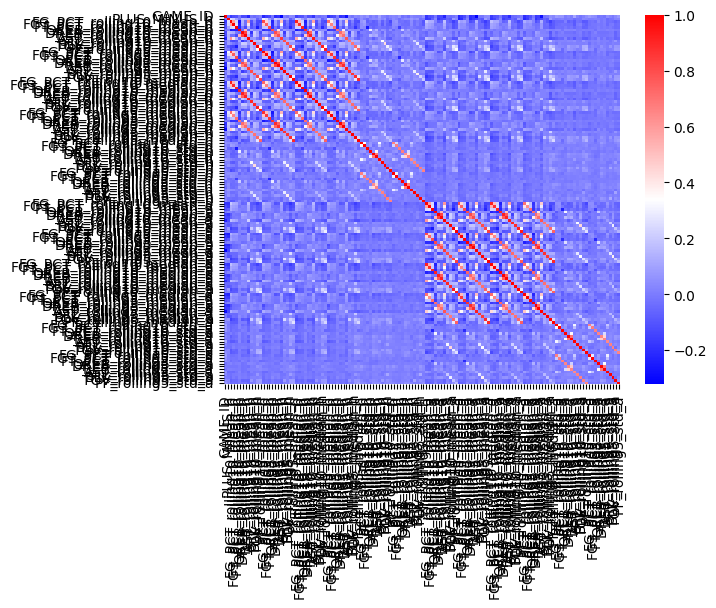

In [54]:
combined_df.drop(columns=['PLUS_MINUS_h'])

corr = combined_df.filter(regex='^(?!TEAM_ABBREVIATION)').corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= 'bwr')

In [55]:
corr_df = corr.stack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head(10)

,feature_1,feature_2,correlation
10012,AST_rolling10_mean_a,AST_rolling10_median_a,0.942956
12938,AST_rolling10_median_a,AST_rolling10_mean_a,0.942956
1102,AST_rolling10_mean_h,AST_rolling10_median_h,0.941463
4028,AST_rolling10_median_h,AST_rolling10_mean_h,0.941463
13478,PF_rolling10_median_a,PF_rolling10_mean_a,0.928626
10552,PF_rolling10_mean_a,PF_rolling10_median_a,0.928626
1642,PF_rolling10_mean_h,PF_rolling10_median_h,0.928183
4568,PF_rolling10_median_h,PF_rolling10_mean_h,0.928183
832,DREB_rolling10_mean_h,DREB_rolling10_median_h,0.921094
3758,DREB_rolling10_median_h,DREB_rolling10_mean_h,0.921094


## X, y

In [56]:
X = combined_df.drop(columns=['PLUS_MINUS_h'])
y = combined_df.PLUS_MINUS_h

In [57]:
# X.drop(columns=['SEASON_ID', 'WL', 'MIN', 'MATCHUP', 'PTS', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'FTM', 'FTA', 'FGM', 'FGA', 'FG3M', 'FG3A'], inplace=True)

In [58]:
X.drop(columns=['GAME_ID'], inplace=True)

In [68]:
X.columns

Index(['TEAM_ABBREVIATION_ATL_h', 'TEAM_ABBREVIATION_BKN_h',
       'TEAM_ABBREVIATION_BOS_h', 'TEAM_ABBREVIATION_CHA_h',
       'TEAM_ABBREVIATION_CHI_h', 'TEAM_ABBREVIATION_CLE_h',
       'TEAM_ABBREVIATION_DAL_h', 'TEAM_ABBREVIATION_DEN_h',
       'TEAM_ABBREVIATION_DET_h', 'TEAM_ABBREVIATION_GSW_h',
       ...
       'FG3_PCT_rolling5_std_a', 'FT_PCT_rolling5_std_a',
       'OREB_rolling5_std_a', 'DREB_rolling5_std_a', 'REB_rolling5_std_a',
       'AST_rolling5_std_a', 'STL_rolling5_std_a', 'BLK_rolling5_std_a',
       'TOV_rolling5_std_a', 'PF_rolling5_std_a'],
      dtype='object', length=192)

In [69]:
X.filter(regex='^(?!TEAM_ABBREVIATION)').columns

Index(['FG_PCT_rolling10_mean_h', 'FG3_PCT_rolling10_mean_h',
       'FT_PCT_rolling10_mean_h', 'OREB_rolling10_mean_h',
       'DREB_rolling10_mean_h', 'REB_rolling10_mean_h', 'AST_rolling10_mean_h',
       'STL_rolling10_mean_h', 'BLK_rolling10_mean_h', 'TOV_rolling10_mean_h',
       ...
       'FG3_PCT_rolling5_std_a', 'FT_PCT_rolling5_std_a',
       'OREB_rolling5_std_a', 'DREB_rolling5_std_a', 'REB_rolling5_std_a',
       'AST_rolling5_std_a', 'STL_rolling5_std_a', 'BLK_rolling5_std_a',
       'TOV_rolling5_std_a', 'PF_rolling5_std_a'],
      dtype='object', length=132)

In [60]:
# X.to_pickle('X_basic_df_2022-09-01.pkl')

In [61]:
# y.to_pickle('y_basic_df_2022-09-01.pkl')

In [62]:
# X.to_pickle('X_basic_df_5yrs_preprocessed.pkl')

In [63]:
# y.to_pickle('y_basic_df_5yrs_preprocessed.pkl')

In [64]:
# X.to_pickle('X_basic_rolling_df_5yrs_preprocessed.pkl')

In [65]:
# y.to_pickle('y_basic_rolling_df_5yrs_preprocessed.pkl')

In [70]:
X.to_pickle('X_basic_df_5yrs_preprocessed_all_rolls.pkl')

In [71]:
y.to_pickle('y_basic_df_5yrs_preprocessed_all_rolls.pkl')